In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('train.csv')


In [32]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [33]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

columns_to_drop = ['Cabin', 'Ticket']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [34]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


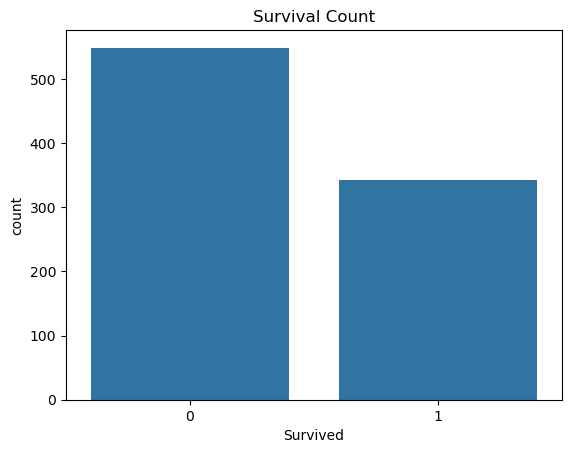

In [35]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()


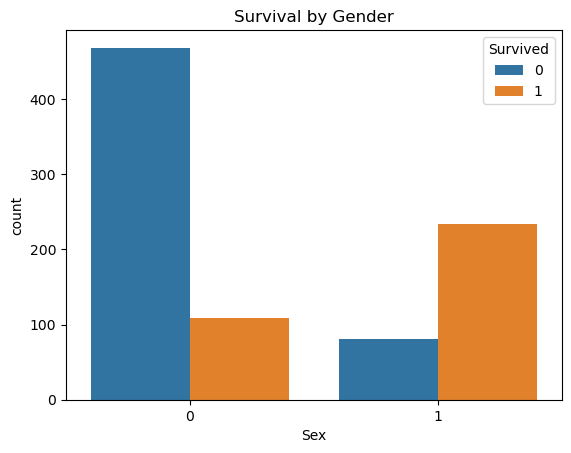

In [36]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()


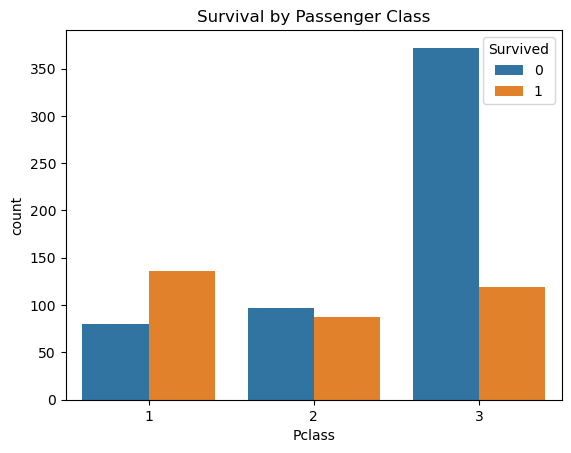

In [37]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()


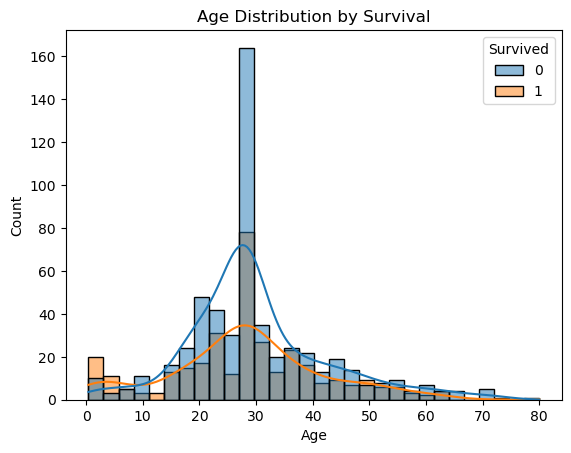

In [38]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()


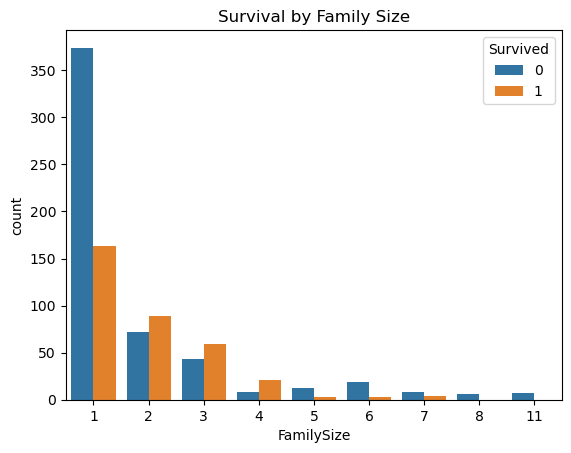

In [39]:
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')
plt.show()


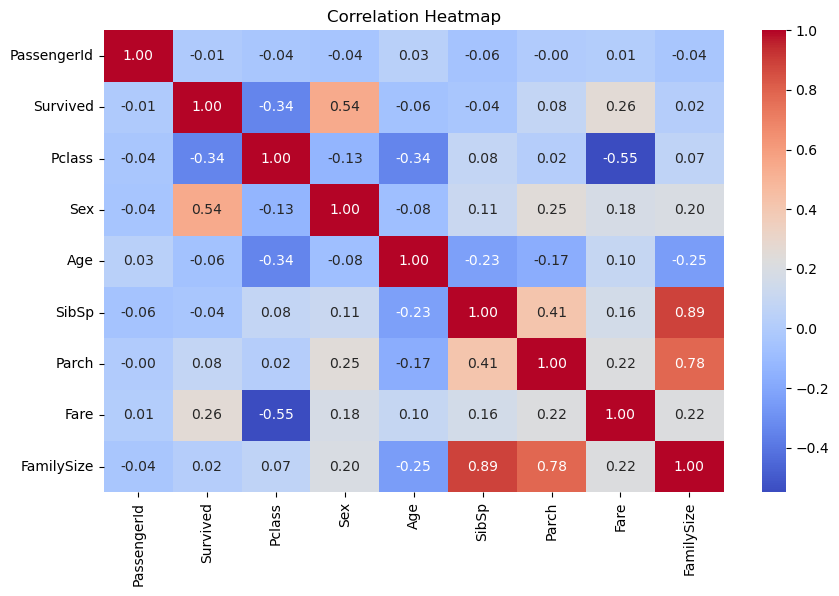

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
